## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import date
from dateutil.relativedelta import relativedelta
import yfinance as yf
from numpy.linalg import inv
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

plt.rcParams["figure.figsize"] = (20,20)

ModuleNotFoundError: No module named 'yfinance'

## Find weightings of the Minimum Variance Portfolio (N risky assets)

In [ ]:
# Define the function for getting the optimal weightings
def get_MVP_weightings(one_vector, Cov_inverse, mu_vector, required_mu):
    c_1_1 = one_vector.T.dot(Cov_inverse).dot(one_vector)
    c_1_mu = one_vector.T.dot(Cov_inverse).dot(mu_vector)
    c_mu_mu = mu_vector.T.dot(Cov_inverse).dot(mu_vector)
    delta = c_1_1 * c_mu_mu - c_1_mu**2
    return 1/delta * (c_1_1*Cov_inverse.dot(mu_vector) - c_1_mu*Cov_inverse.dot(one_vector)) * required_mu + 1/delta * (c_mu_mu*Cov_inverse.dot(one_vector) - c_1_mu*Cov_inverse.dot(mu_vector))

In [ ]:
mu = np.array([0.02, 0.01, 0.015]).T
Cov = np.array([[0.0025, 0.001, 0.00075],
                [0.001, 0.0016, 0.0012],
                [0.00075, 0.0012, 0.0036]])
one = np.ones(3).T
mu_star = 0.015
MVP_weightings = get_MVP_weightings(one, inv(Cov), mu, mu_star)
MVP_sigma = np.sqrt(MVP_weightings.T.dot(Cov).dot(MVP_weightings))
print(MVP_sigma)

## Find variance of the Minimum Variance Portfolio (N risky assets)

In [ ]:
# Define the function for getting the minimum variance
def get_MVP_variance(one_vector, Cov_inverse, mu_vector, required_mu):
    c_1_1 = one_vector.T.dot(Cov_inverse).dot(one_vector)
    c_1_mu = one_vector.T.dot(Cov_inverse).dot(mu_vector)
    c_mu_mu = mu_vector.T.dot(Cov_inverse).dot(mu_vector)
    delta = c_1_1 * c_mu_mu - c_1_mu**2
    return 1/delta * (c_1_1*required_mu**2 - 2*c_1_mu*required_mu + c_mu_mu)

In [2]:
MVP_sigma_2 = np.sqrt(get_MVP_variance(one, inv(Cov), mu, mu_star))
print(MVP_sigma_2)

NameError: name 'get_MVP_variance' is not defined

## Plot the Efficient Frontier (N risky assets)

In [3]:
mu_star_2 = np.linspace(-0.1, 0.1, 100)
MVP_sigma_3 = np.sqrt(get_MVP_variance(one, inv(Cov), mu, mu_star_2))
plt.plot(MVP_sigma_3, mu_star_2)
plt.xlabel("Sigma")
plt.ylabel("Mu")
plt.show()

NameError: name 'get_MVP_variance' is not defined

## Find weightings of the Minimum Variance Portfolio (1 risk-free and N risky assets)

In [4]:
def get_MVP_weightings_2(one_vector, Cov_inverse, mu_vector, required_mu, r):
    c_1_1 = one_vector.T.dot(Cov_inverse).dot(one_vector)
    c_1_mu = one_vector.T.dot(Cov_inverse).dot(mu_vector)
    c_mu_mu = mu_vector.T.dot(Cov_inverse).dot(mu_vector)
    w_r_optimial = (c_mu_mu - (r + required_mu) * c_1_mu + r * required_mu * c_1_1) / (c_mu_mu - 2 * r * c_1_mu + (r**2) * c_1_1)
    w_optimial = (required_mu - r) * (Cov_inverse.dot(mu_vector) - r * Cov_inverse.dot(one_vector)) / (c_mu_mu - 2 * r * c_1_mu + (r**2) * c_1_1)
    return np.append([w_r_optimial], w_optimial.T).T

In [10]:
mu = np.array([0.02, 0.01, 0.015]).T
Cov = np.array([[0.0025, 0.001, 0.00075],
                [0.001, 0.0016, 0.0012],
                [0.00075, 0.0012, 0.0036]])
one = np.ones(3).T
mu_star = 0.015
r = 0.001
MVP_weightings_2 = get_MVP_weightings_2(one, inv(Cov), mu, mu_star, r)
MVP_weightings_2

array([ 0.24110305,  0.60342059, -0.07166794,  0.2271443 ])

## Plot Efficient Frontiers Including risk-free and risky assets

In [5]:
def plot_efficient_frontiers(one_vector, Cov_inverse, mu_vector, required_mu, r, sigma):
    c_1_1 = one_vector.T.dot(Cov_inverse).dot(one_vector)
    c_1_mu = one_vector.T.dot(Cov_inverse).dot(mu_vector)
    c_mu_mu = mu_vector.T.dot(Cov_inverse).dot(mu_vector)
    gamma = abs(np.sqrt(c_mu_mu - 2 * r * c_1_mu + (r**2) * c_1_1))
    mu = gamma * sigma + r
    sigma_2 = np.sqrt(get_MVP_variance(one_vector, Cov_inverse, mu_vector, required_mu))
    plt.plot(sigma_2, required_mu, c="orange")
    plt.plot(sigma, mu)
    plt.show()

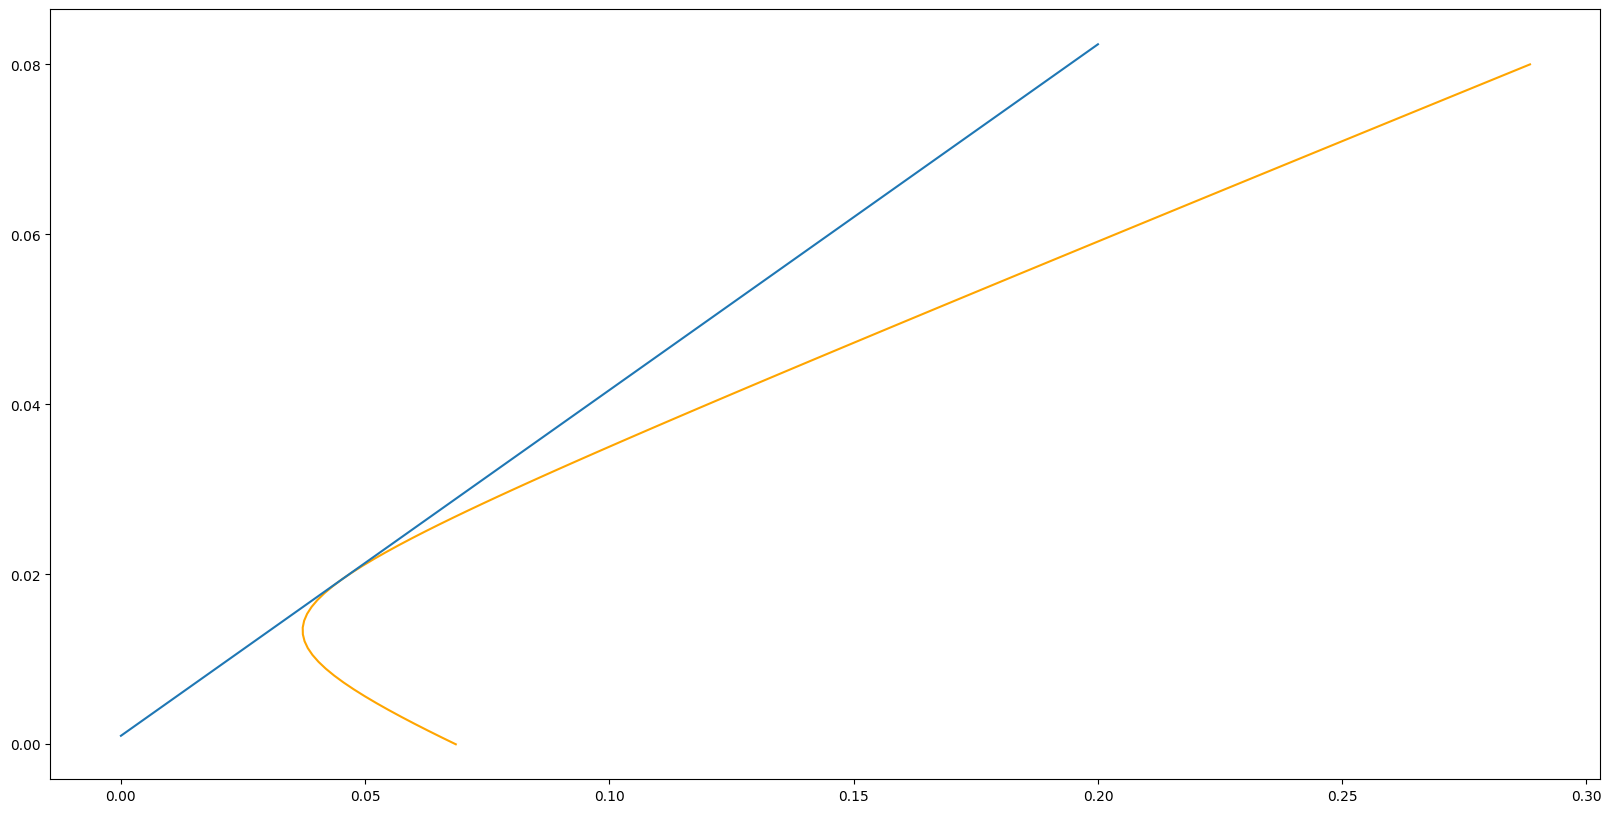

In [20]:
mu = np.array([0.02, 0.01, 0.015]).T
Cov = np.array([[0.0025, 0.001, 0.00075],
                [0.001, 0.0016, 0.0012],
                [0.00075, 0.0012, 0.0036]])
one = np.ones(3).T
mu_star = np.linspace(0, 0.08, 100)
sigma = np.linspace(0, 0.2, 100)
r = 0.001
plot_efficient_frontiers(one, inv(Cov), mu, mu_star, r, sigma)

## Tengency Portfolio

In [6]:
# Get weightings, mu and sigma of the tengency portfolio
def get_tangency_portfolio(one_vector, Cov_inverse, mu_vector, r):
    c_1_1 = one_vector.T.dot(Cov_inverse).dot(one_vector)
    c_1_mu = one_vector.T.dot(Cov_inverse).dot(mu_vector)
    c_mu_mu = mu_vector.T.dot(Cov_inverse).dot(mu_vector)
    gamma = abs(np.sqrt(c_mu_mu - 2 * r * c_1_mu + (r**2) * c_1_1))
    weightings = Cov_inverse.dot(mu_vector - r * one_vector) / (c_1_mu - r * c_1_1)
    mu = (c_mu_mu - r * c_1_mu) / (c_1_mu - r * c_1_1)
    sigma = gamma / (c_1_mu - r * c_1_1)
    return weightings, mu, sigma


In [13]:
mu = np.array([0.02, 0.01, 0.015]).T
Cov = np.array([[0.0025, 0.001, 0.00075],
                [0.001, 0.0016, 0.0012],
                [0.00075, 0.0012, 0.0036]])
one = np.ones(3).T
r = 0.001
print(get_tangency_portfolio(one, inv(Cov), mu, r))

(array([ 0.7951285 , -0.09443699,  0.29930849]), 0.019447827433171642, 0.0453466295963927)
